In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
old_db = automap_base()
# reflect the tables
old_db.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
old_db.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
meas = old_db.classes.measurement
stat = old_db.classes.station

In [8]:
# Create our session (link) from Python to the DB
sess = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
engine.execute('SELECT max(date) FROM Measurement').fetchall()

[('2017-08-23',)]

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

annual_data = sess.query(meas.date, meas.prcp).filter(meas.date >= "2016-08-23").\
    filter(meas.date <= "2017-08-23").all()
# Save the query results as a Pandas DataFrame and set the index to the date column
annual_df = pd.DataFrame(annual_data).set_index('date')

# Sort the dataframe by date
annual_df=annual_df.rename(columns={'prcp':'Precipitation'})
annual_df=annual_df.sort_values(by='date').dropna()
annual_df.head()

,Precipitation
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


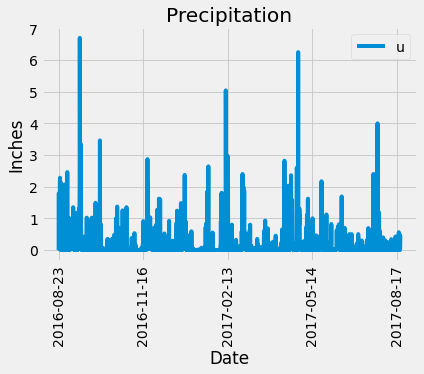

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
annual_df.plot(rot=90)
plt.title("Precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend('upper right')
plt.savefig("Precipitation.png")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
annual_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
station_count = sess.query(stat.id).count() 
print(f'There are {station_count} stations.')

There are 9 stations.


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
top_station = sess.query(meas.station, func.count(meas.station)).\
group_by(meas.station).order_by(func.count(meas.station).desc()).all()
top_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
best_boy = 'USC00519281'
sess.query(func.min(meas.tobs),
            func.max(meas.tobs),
            func.avg(meas.tobs)).filter(meas.station == best_boy).all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temp')

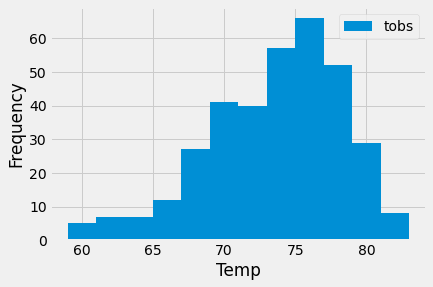

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
best_boy_data = top_station[0][0]

results = sess.query(meas.date, meas.tobs).\
                        filter(meas.date >= "2016-08-24").\
                        filter(meas.date <= "2017-08-23").\
                        filter(meas.station == best_boy_data).all()

# convert to dataframe
results_df = pd.DataFrame(results)

# historgram 
results_df.plot.hist(bins=12)
plt.xlabel("Temp")

# Close session

In [17]:
# Close Session
sess.close()